In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dropout, LSTM, Flatten, Dense, BatchNormalization
from keras.layers.convolutional import Conv1D, MaxPooling1D
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix

In [2]:
#create confusion Matrix
def confusionMatrix(model, testX, testY):
    pred = model.predict(testX)
    predy = []
    for i in range(0,len(pred)):
        if pred[i] >= .5:
            predy.append(1)
        else:
            predy.append(0)
        
    print(confusion_matrix(testY,predy))
    
#Calculates our model metrics
def modelMetrics(testX, testY, model):
    y_scores = model.predict(testX)
    precision, recall, thresholds = precision_recall_curve(testY, y_scores)
    rec80 = np.max(recall[precision >= .8])
    print("Recall at 80% Precision: " +str(rec80))
    aucPR = auc(recall, precision)
    print("PR-AUC: " + str(aucPR))
    
    return rec80, aucPR, 

#plots a PR curve
def PRplot(testX, testY, model):
    y_scores = model.predict(testX)
    precision, recall, thresholds = precision_recall_curve(testY, y_scores)
    plt.plot(recall, precision)
    plt.title("PR curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")

In [3]:
def normalize(data): 
    for i in data.columns:
        data[i] = (data[i] - np.mean(data[i]))/np.std(data[i])
    return np.nan_to_num(data)

In [4]:
#Concatenate positive and negative samples
trainFull = pd.read_csv("PreprocessedData/trainFull.csv")
testFull = pd.read_csv("PreprocessedData/testFull.csv")

trainFull = trainFull.sample(frac = 1)
testFull = testFull.sample(frac = 1)
    
#Reduce features and extract labels
trainX = trainFull.iloc[:,:-2]
trainY = trainFull.iloc[:,-1]
testX = testFull.iloc[:,:-2]
testY = testFull.iloc[:,-1]

trainX = normalize(trainX)
testX = normalize(testX)

#Reshape data to 3D for CNN

trainX = trainX[..., None]
trainY = trainY.to_numpy()[..., None]
testX = testX[..., None]
testY = testY.to_numpy()[..., None]


In [5]:
def newModel(numConvFilters = 242, dropout = .215, numDenseNodes = 190):
    #Create new sequential model
    model = Sequential()

    #Add 1D Convolutional layers
    model.add((Conv1D(filters=32, kernel_size=3, activation='relu')))
    model.add((Conv1D(filters=numConvFilters, kernel_size=3, activation='relu')))
    #Add Max Pooling layer
    model.add((MaxPooling1D(pool_size=2)))
    #Apply dropout
    model.add(Dropout(dropout))
    #Flatten model
    model.add(Flatten())
    #Add fully connected dense layer
    model.add(Dense(numDenseNodes, activation='sigmoid'))
    #Add output node
    model.add(Dense(1, activation='sigmoid'))
    
    #Define optimizer
    adam = tf.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
    #Compile model
    model.compile(optimizer=adam, loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC(curve='PR'),   
                                                                       tf.keras.metrics.PrecisionAtRecall(0.8)])
    return model

In [6]:
model0 = newModel()
model0.fit(trainX, trainY, epochs = 30, batch_size=20, verbose = 1)

2022-04-15 14:37:00.843991: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-15 14:37:01.330494: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
758/758 [==============================] - 27s 31ms/step - loss: 0.5799 - auc: 0.7632 - precision_at_recall: 0.6463
Epoch 2/30
758/758 [==============================] - 18s 24ms/step - loss: 0.5263 - auc: 0.8187 - precision_at_recall: 0.6958
Epoch 3/30
758/758 [==============================] - 16s 21ms/step - loss: 0.5038 - auc: 0.8367 - precision_at_recall: 0.7155
Epoch 4/30
758/758 [==============================] - 17s 22ms/step - loss: 0.4879 - auc: 0.8479 - precision_at_recall: 0.7273
Epoch 5/30
758/758 [==============================] - 17s 23ms/step - loss: 0.4769 - auc: 0.8554 - precision_at_recall: 0.7419
Epoch 6/30
758/758 [==============================] - 18s 24ms/step - loss: 0.4662 - auc: 0.8637 - precision_at_recall: 0.7499
Epoch 7/30
758/758 [==============================] - 18s 24ms/step - loss: 0.4559 - auc: 0.8704 - precision_at_recall: 0.7582
Epoch 8/30
758/758 [==============================] - 17s 22ms/step - loss: 0.4459 - auc: 0.8748 - precision_at

In [11]:
#Concatenate positive and negative samples
trainFull = pd.read_csv("PreprocessedData/trainFull.csv")
testFull = pd.read_csv("PreprocessedData/testFull.csv")

trainFull = trainFull.sample(frac = 1)
testFull = testFull.sample(frac = 1)
    
#Reduce features and extract labels
trainX2 = trainFull.iloc[:,:-2]
trainY2 = trainFull.iloc[:,-1]
testX2 = testFull.iloc[:,:-2]
testY2 = testFull.iloc[:,-1]

#trainX = normalize(trainX)
#testX = normalize(testX)

#Reshape data to 3D for CNN

trainX2 = trainX2.to_numpy()[..., None]
trainY2 = trainY2.to_numpy()[..., None]
testX2 = testX2.to_numpy()[..., None]
testY2 = testY2.to_numpy()[..., None]


In [12]:
def newModel(numConvFilters = 242, dropout = .215, numDenseNodes = 190):
    #Create new sequential model
    model = Sequential()

    #Add 1D Convolutional layers
    model.add(BatchNormalization())
    model.add((Conv1D(filters=32, kernel_size=3, activation='relu')))
    model.add((Conv1D(filters=numConvFilters, kernel_size=3, activation='relu')))
    #Add Max Pooling layer
    model.add((MaxPooling1D(pool_size=2)))
    #Apply dropout
    model.add(Dropout(dropout))
    #Flatten model
    model.add(Flatten())
    #Add fully connected dense layer
    model.add(Dense(numDenseNodes, activation='sigmoid'))
    #Add output node
    model.add(Dense(1, activation='sigmoid'))
    
    #Define optimizer
    adam = tf.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
    #Compile model
    model.compile(optimizer=adam, loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC(curve='PR'),   
                                                                       tf.keras.metrics.PrecisionAtRecall(0.8)])
    return model

In [13]:
model1 = newModel()
model1.fit(trainX2, trainY2, epochs = 30, batch_size=20, verbose = 1)

Epoch 1/30
758/758 [==============================] - 23s 29ms/step - loss: 0.6762 - auc_1: 0.5888 - precision_at_recall_1: 0.5416
Epoch 2/30
758/758 [==============================] - 18s 24ms/step - loss: 0.6512 - auc_1: 0.6431 - precision_at_recall_1: 0.5692
Epoch 3/30
758/758 [==============================] - 20s 27ms/step - loss: 0.6451 - auc_1: 0.6526 - precision_at_recall_1: 0.5832
Epoch 4/30
758/758 [==============================] - 19s 25ms/step - loss: 0.6408 - auc_1: 0.6555 - precision_at_recall_1: 0.5874
Epoch 5/30
758/758 [==============================] - 21s 28ms/step - loss: 0.6333 - auc_1: 0.6702 - precision_at_recall_1: 0.5973
Epoch 6/30
758/758 [==============================] - 23s 31ms/step - loss: 0.6281 - auc_1: 0.6767 - precision_at_recall_1: 0.6039
Epoch 7/30
758/758 [==============================] - 25s 33ms/step - loss: 0.6210 - auc_1: 0.6866 - precision_at_recall_1: 0.6123
Epoch 8/30
758/758 [==============================] - 25s 34ms/step - loss: 0.6123 

In [15]:
model2 = newModel()
model2.fit(trainX, trainY, epochs = 30, batch_size=20, verbose = 1)

Epoch 1/30
758/758 [==============================] - 18s 22ms/step - loss: 0.5788 - auc_2: 0.7639 - precision_at_recall_2: 0.6487
Epoch 2/30
758/758 [==============================] - 21s 28ms/step - loss: 0.5301 - auc_2: 0.8139 - precision_at_recall_2: 0.6933
Epoch 3/30
758/758 [==============================] - 22s 29ms/step - loss: 0.5109 - auc_2: 0.8306 - precision_at_recall_2: 0.7075
Epoch 4/30
758/758 [==============================] - 23s 30ms/step - loss: 0.4944 - auc_2: 0.8441 - precision_at_recall_2: 0.7227
Epoch 5/30
758/758 [==============================] - 19s 24ms/step - loss: 0.4798 - auc_2: 0.8541 - precision_at_recall_2: 0.7373
Epoch 6/30
758/758 [==============================] - 20s 26ms/step - loss: 0.4658 - auc_2: 0.8637 - precision_at_recall_2: 0.7523
Epoch 7/30
758/758 [==============================] - 21s 27ms/step - loss: 0.4517 - auc_2: 0.8721 - precision_at_recall_2: 0.7631
Epoch 8/30
758/758 [==============================] - 20s 27ms/step - loss: 0.4363 

Standard Scaled
Recall at 80% Precision: 0.9050131926121372
PR-AUC: 0.9226334498014034
[[1611  284]
 [ 312 1583]]


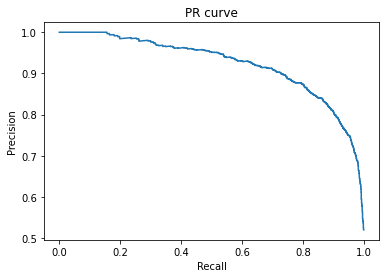

In [16]:
print("Standard Scaled")
modelMetrics(testX, testY, model0)
confusionMatrix(model0, testX, testY)
PRplot(testX, testY, model0)


Batch Normalized
Recall at 80% Precision: 0.6696569920844327
PR-AUC: 0.8412815674940174
[[1360  535]
 [ 383 1512]]


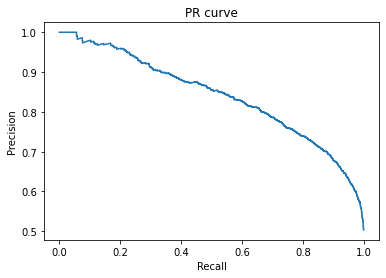

In [18]:
print("Batch Normalized")
modelMetrics(testX2, testY2, model1)
confusionMatrix(model1, testX2, testY2)
PRplot(testX2, testY2, model1)

Batch Normalized and Standard Scaled
Recall at 80% Precision: 0.899736147757256
PR-AUC: 0.9231188121168559
[[1610  285]
 [ 324 1571]]


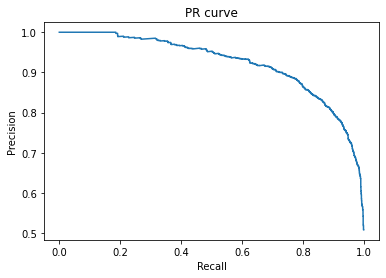

In [19]:
print("Batch Normalized and Standard Scaled")
modelMetrics(testX, testY, model2)
confusionMatrix(model2, testX, testY)
PRplot(testX, testY, model2)